This assignmnet based on Heart disease dataset https://www.kaggle.com/zhaoyingzhu/heartcsv This assignmnet shows how to clean the noisy data and tune few models (RandomForestClassifier | KNeighborsClassifier | XGBClassifier)
 to predict the Heart disease. The purpose of this exercise is to identify the presence of heart disease in patients using various attributes along with standard data cleaning processes.

# **Data cleaning, preprocessing  and visualization**

#Data Wrangling - Import Libraries 

In [ ]:
#import all the neccesary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import matplotlib as mpl
import tensorflow as tf
from tqdm import tqdm

import matplotlib.mlab as mlab


Let's get started by importing Heart diseases data:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Heart.csv to Heart.csv



# Read the dataset

In [ ]:
import io
df = pd.read_csv(io.StringIO(uploaded['Heart.csv'].decode('utf-8')))

In [ ]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
plt.style.use('ggplot')

In [ ]:
from matplotlib.pyplot import figure

In [ ]:
%matplotlib inline


# Identify shape and data types

In [ ]:
 
print(df.shape)

(303, 15)


In [ ]:
print(df.dtypes)

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object


# Select the numerical data columns

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])

In [ ]:
numeric_cols = df_numeric.columns.values

In [ ]:
print(numeric_cols)

['Unnamed: 0' 'Age' 'Sex' 'RestBP' 'Chol' 'Fbs' 'RestECG' 'MaxHR' 'ExAng'
 'Oldpeak' 'Slope' 'Ca']


# Select the non-numerical data columns

In [ ]:

df_non_numeric = df.select_dtypes(exclude=[np.number])

In [ ]:
non_numeric_cols = df_non_numeric.columns.values

In [ ]:
print(non_numeric_cols)

['ChestPain' 'Thal' 'AHD']


In [ ]:
#to check only those column which have null in them
df[[i for i in df.columns if df[i].isnull().sum()>0]].isnull().sum()

Ca      4
Thal    2
dtype: int64

In [ ]:
# Removing the NaN
df.Thal.value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

#  Identifying missing data
After taking a brief look, I know there are 303 rows, and 15 columns of data. This is pretty small.We can identify there are only numerical data columns Up next, finding out what data is missing. Identifying missing data: Heatmap 
This is a good option when there are a low amount of features, like this example


In [ ]:
cols = df.columns[:14] # Listing all 14 columns here

In [ ]:

colors = ['#ff4040', '#bada55'] # First hex color is green for available data, second is red for otherwise/missing

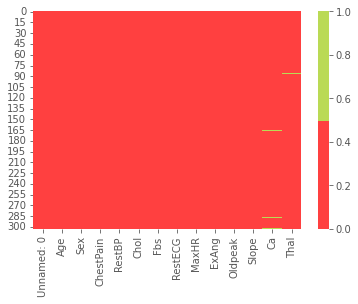

In [ ]:
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

# The heatmap observation
 The heatmap observation above demonstrates there is no missing data for all features. The horizontal axis shows the feature name, the vertical axis shows the number of observations

# Further verifying no missing data: data percentage list 
Data percentage lists are great when there are more features, or you need something to compliment it

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Age - 0%
Sex - 0%
ChestPain - 0%
RestBP - 0%
Chol - 0%
Fbs - 0%
RestECG - 0%
MaxHR - 0%
ExAng - 0%
Oldpeak - 0%
Slope - 0%
Ca - 1%
Thal - 1%
AHD - 0%


# Identifying irregular data/outliers: Histograms and Box Plots
When your features are numeric, histograms & box plots are good friends. :-)
Below: a histogram of feature of resting blood pressure ('RestBP')

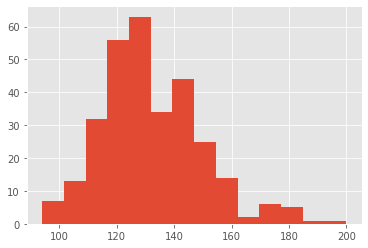

In [ ]:
df['RestBP'].hist(bins=14)

In [ ]:
# Above: Fasting blood sugar level data looks to be fairly normal
# explore the some potential outliers

# Below: A box plot of the same category ('RestBP')

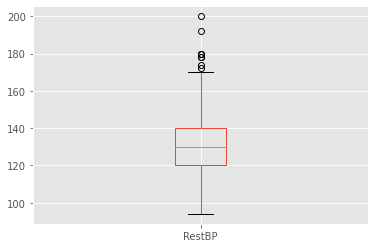

In [ ]:
df.boxplot(column=['RestBP'])

In [ ]:
# Above: Average occurs around 120-140, and a few points occur beyond 170 bpm

In [ ]:
# For numeric features, the outliers could be so distinct that the box plot cannot effectively visualize them

In [ ]:
df['RestBP'].describe()

count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestBP, dtype: float64

In [ ]:
# There are many other ways to identify outliers such as z-scores, scatter plots, and clutering
# While outliers are not difficult to detect, it can be difficult to know what to do once find them
# We can either drop them, or keep them; it all depends on the dataset and your goal

In [ ]:
# Identifying duplicated: All features based 
# First, remove unique identifier 'age' in the dataset 
# Second, create a dataset called 'df_dedupped' by dropping duplicates
# Third, Compare shapes of two datasets (df and df_dedupped) to discover number of duplicated rows

In [ ]:
df_dedupped = df.drop('Age', axis=1).drop_duplicates()
print(df.shape)
print(df_dedupped.shape)

(303, 15)
(303, 14)


In [ ]:
# Sometimes it's better to remove duplicate data based on a set of unique identifiers
# The chances of two patients having the same unique values are close to zero

In [ ]:
# Addressing inconsistent data: Formatting
# This is more relevant for timestamps, zipcodes, etc but it's good practice to check

In [ ]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


# **Model training with scikit learn**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
# to plot confusion matrix of predicted and Y_test value
from sklearn.metrics import confusion_matrix

#for scalling the data
from sklearn.preprocessing import MinMaxScaler
#Library for getting mutual info
from sklearn.feature_selection import mutual_info_regression
# for calculating all scores
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,roc_auc_score, r2_score

In [ ]:
print(df.ChestPain.unique())
print(df.Thal.unique())
print(df.AHD.unique())

['typical' 'asymptomatic' 'nonanginal' 'nontypical']
['fixed' 'normal' 'reversable' nan]
['No' 'Yes']


In [ ]:
#to check only those column which have null in them
df[[i for i in df.columns if df[i].isnull().sum()>0]].isnull().sum()

Ca    4
dtype: int64

In [ ]:
df.Thal = df.Thal.fillna('normal')
df.Thal.value_counts()

normal        168
reversable    117
fixed          18
Name: Thal, dtype: int64

In [ ]:
df.Ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [ ]:
# As the maximum number of cases have 0.0 as the Ca, replacing the missing value to 0.0
df.Ca = df.Ca.fillna(0.0)
df.Ca.value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [ ]:
#nominal encoding technique
heart_encoding = pd.get_dummies(df[['ChestPain', 'Thal', 'AHD']])
heart_final = pd.concat([df, heart_encoding],1)
heart_final = heart_final.drop(['ChestPain', 'Thal', 'AHD'], axis = 1)
heart_final.head(2)

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0,1,0
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0,0,1


In [ ]:
heart_final.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'ChestPain_asymptomatic',
       'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical',
       'Thal_fixed', 'Thal_normal', 'Thal_reversable', 'AHD_No', 'AHD_Yes'],
      dtype='object')

In [ ]:
heart_scaled = heart_final

In [ ]:
# Scaling all values except the target variable = AHD_Yes
MMscal=MinMaxScaler()
features=['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_asymptomatic',
       'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical',
       'Thal_fixed', 'Thal_normal', 'Thal_reversable']
heart_scaled[features] = MMscal.fit_transform(heart_final[features])
heart_scaled.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes
0,1,0.708333,1.0,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0
1,2,0.791667,1.0,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
2,3,0.791667,1.0,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
3,4,0.166667,1.0,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0
4,5,0.250000,0.0,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0


In [ ]:
# Creating Features and Target variable
X = heart_scaled.drop('AHD_Yes', axis=1)
Y = heart_scaled.AHD_Yes

In [ ]:
#splitting the data into training and testing data sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2 ,random_state=1)

In [ ]:
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info = mutual_info.sort_values(ascending=False)
mutual_info

AHD_No                    0.651785
ChestPain_asymptomatic    0.189469
Thal_normal               0.176190
Oldpeak                   0.121406
Ca                        0.115025
ExAng                     0.081081
Thal_reversable           0.073479
ChestPain_nonanginal      0.061652
Unnamed: 0                0.047880
MaxHR                     0.046014
RestBP                    0.037526
Slope                     0.036471
Chol                      0.019776
RestECG                   0.013277
ChestPain_typical         0.012802
ChestPain_nontypical      0.007789
Sex                       0.004294
Thal_fixed                0.001969
Fbs                       0.000000
Age                       0.000000
dtype: float64

In [ ]:
#Considering the columns for training the model which are more than 0% of information shared with dependent variable/feature
Req_Columns = list(mutual_info[mutual_info>0].index)
Req_Columns

['AHD_No',
 'ChestPain_asymptomatic',
 'Thal_normal',
 'Oldpeak',
 'Ca',
 'ExAng',
 'Thal_reversable',
 'ChestPain_nonanginal',
 'Unnamed: 0',
 'MaxHR',
 'RestBP',
 'Slope',
 'Chol',
 'RestECG',
 'ChestPain_typical',
 'ChestPain_nontypical',
 'Sex',
 'Thal_fixed']

In [ ]:
X_train_final = X_train[Req_Columns]
X_train_final.head(1)

,AHD_No,ChestPain_asymptomatic,Thal_normal,Oldpeak,Ca,ExAng,Thal_reversable,ChestPain_nonanginal,Unnamed: 0,MaxHR,RestBP,Slope,Chol,RestECG,ChestPain_typical,ChestPain_nontypical,Sex,Thal_fixed
62,0,1.0,0.0,0.354839,1.0,1.0,1.0,0.0,63,0.458015,0.320755,0.5,0.205479,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_test_final = X_test[Req_Columns]
X_test_final.head(1)

,AHD_No,ChestPain_asymptomatic,Thal_normal,Oldpeak,Ca,ExAng,Thal_reversable,ChestPain_nonanginal,Unnamed: 0,MaxHR,RestBP,Slope,Chol,RestECG,ChestPain_typical,ChestPain_nontypical,Sex,Thal_fixed
204,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,205,0.687023,0.150943,0.0,0.194064,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Create a function for evaluating metrics
def evaluation(Y_test,Y_pred):
    acc=accuracy_score(Y_test,Y_pred)
    rcl=recall_score(Y_test,Y_pred)
    f1=f1_score(Y_test,Y_pred)
    auc_score=roc_auc_score(Y_test,Y_pred)
    prec_score=precision_score(Y_test,Y_pred)
    
    metric_dict={'accuracy': round(acc*100,2),
               'recall': round(rcl*100,2),
               'F1 score': round(f1*100,2),
               'auc score': round(auc_score*100,2),
               'precision': round(prec_score*100,2)
                }
    
    return print(metric_dict)

# Training the Data woth different Models

In [ ]:
# KNeighborsClassifier (K-Nearest Neighbour)

In [ ]:
np.random.seed(42)
KNC_model=  KNeighborsClassifier()
KNC_model.fit(X_train_final,y_train)
KNC_model_y_pred=KNC_model.predict(X_test_final)
KNC_model_r2_score=round(r2_score(y_test,KNC_model_y_pred)*100,2)
print("R2 Score for predicted value: ",KNC_model_r2_score)
print("Accuracy on Training set: ",round(KNC_model.score(X_train_final,y_train)*100,2))
KNC_model_score = round(KNC_model.score(X_test_final,y_test)*100,2)
print("Accuracy on Testing set: ",KNC_model_score)
evaluation(y_test,KNC_model_y_pred)

R2 Score for predicted value:  -105.99
Accuracy on Training set:  77.69
Accuracy on Testing set:  49.18
{'accuracy': 49.18, 'recall': 48.15, 'F1 score': 45.61, 'auc score': 49.07, 'precision': 43.33}


In [ ]:
# RandomForestClassifier

In [ ]:
np.random.seed(42)
RFC_model=RandomForestClassifier()
RFC_model.fit(X_train_final,y_train)
RFC_model_y_pred=RFC_model.predict(X_test_final)
RFC_model_r2_score=round(r2_score(y_test,RFC_model_y_pred)*100,2)
print("R2 Score for predicted value: ",RFC_model_r2_score)
print("Accuracy on Training set: ",round(RFC_model.score(X_train_final,y_train)*100,2))
RFC_model_score = round(RFC_model.score(X_test_final,y_test)*100,2)
print("Accuracy on Testing set: ",RFC_model_score)
evaluation(y_test,RFC_model_y_pred)

R2 Score for predicted value:  100.0
Accuracy on Training set:  100.0
Accuracy on Testing set:  100.0
{'accuracy': 100.0, 'recall': 100.0, 'F1 score': 100.0, 'auc score': 100.0, 'precision': 100.0}


In [ ]:
# XGBClassifier (XG Boost/ Extreme Gradient Boost)

In [ ]:
XGB_model=XGBClassifier()
XGB_model.fit(X_train_final,y_train)
XGB_model_y_pred=XGB_model.predict(X_test_final)
XGB_model_r2_score=round(r2_score(y_test,XGB_model_y_pred)*100,2)
print("R2 Score for predicted value: ",XGB_model_r2_score)
print("Accuracy on Training set: ",round(XGB_model.score(X_train_final,y_train)*100,2))
XGB_model_score = round(XGB_model.score(X_test_final,y_test)*100,2)
print("Accuracy on Testing set: ",XGB_model_score)
evaluation(y_test,XGB_model_y_pred)

R2 Score for predicted value:  100.0
Accuracy on Training set:  100.0
Accuracy on Testing set:  100.0
{'accuracy': 100.0, 'recall': 100.0, 'F1 score': 100.0, 'auc score': 100.0, 'precision': 100.0}
